In [83]:
from transformers import pipeline
from pysentimiento import create_analyzer
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [60]:
classificator = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [61]:
classificator("I love it but I hate it so much more")

[{'label': 'NEGATIVE', 'score': 0.8241090178489685}]

In [62]:
modelo = create_analyzer(task="sentiment", lang="pt")

In [63]:
modelo.predict("não é tão bom mas também não é ruim")

AnalyzerOutput(output=NEU, probas={NEU: 0.641, NEG: 0.230, POS: 0.129})

In [64]:
resenhas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/hugging_face/refs/heads/main/Dados/resenhas.csv")

In [65]:
resenhas.head()

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...


In [70]:
classificacoes = [modelo.predict(resenha).output for resenha in resenhas["Resenha"]]

In [71]:
len(classificacoes)

36

In [72]:
resenhas['classificacao'] = classificacoes

In [78]:
resenhas_grouped = resenhas.groupby("classificacao").size().reset_index(name="count")

<Axes: xlabel='classificacao', ylabel='count'>

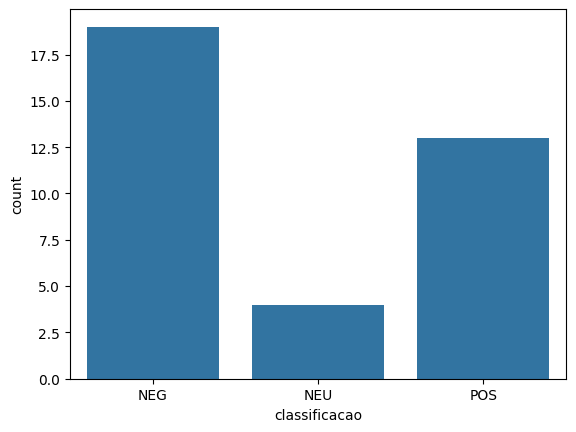

In [79]:
sns.barplot(resenhas_grouped, x=resenhas_grouped["classificacao"], y=resenhas_grouped["count"])

In [84]:
nltk.download("stopwords")
portuguese_stopwords = stopwords.words("portuguese")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
def word_cloud(data, coluna, sentimento):

  texto_sentimento = data[data["classificacao"] == sentimento][coluna]

  texto_unido = " ".join(texto_sentimento)

  palavras = texto_unido.split()
  palavras_filtradas = [palavra for palavra in palavras if palavra not in portuguese_stopwords]
  texto_filtrado = " ".join(palavras_filtradas)

  nuvem_palavras = WordCloud(width=800, height=500, max_words=50).generate(texto_filtrado)

  plt.figure(figsize=(10, 5))
  plt.imshow(nuvem_palavras, interpolation="bilinear")
  plt.axis("off")
  plt.show()

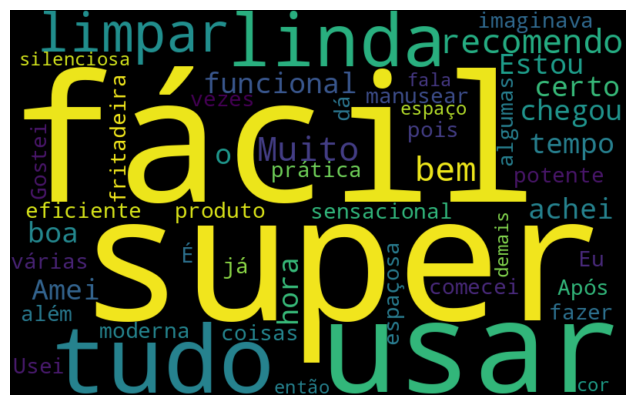

In [92]:
word_cloud(resenhas, "Resenha", "POS")

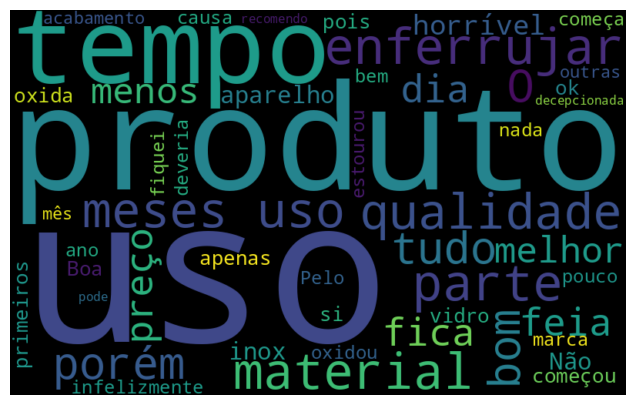

In [93]:
word_cloud(resenhas, "Resenha", "NEG")